In [1]:
import pandas as pd

# Small sample dataset
data = {
    "review": [
        "This medicine really helped me recover quickly.",
        "I had severe side effects after using this drug.",
        "Worked perfectly for my headache, very effective.",
        "Did not work at all, waste of money.",
        "Excellent results! My fever was gone in one day.",
        "Terrible experience, nausea and vomiting.",
        "Good for mild pain, I recommend it.",
        "Made my condition worse, not recommended.",
        "Helped me sleep better and feel relaxed.",
        "No improvement after using this medicine."
    ],
    "condition": [
        "Positive", "Negative", "Positive", "Negative", "Positive",
        "Negative", "Positive", "Negative", "Positive", "Negative"
    ]
}

df = pd.DataFrame(data)
df.to_csv("drug_reviews.csv", index=False)
print("✅ drug_reviews.csv created successfully!")
df.head()

✅ drug_reviews.csv created successfully!


,review,condition
0,This medicine really helped me recover quickly.,Positive
1,I had severe side effects after using this drug.,Negative
2,"Worked perfectly for my headache, very effective.",Positive
3,"Did not work at all, waste of money.",Negative
4,Excellent results! My fever was gone in one day.,Positive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("drug_reviews.csv")
print(df.head())

                                              review condition
0    This medicine really helped me recover quickly.  Positive
1   I had severe side effects after using this drug.  Negative
2  Worked perfectly for my headache, very effective.  Positive
3               Did not work at all, waste of money.  Negative
4   Excellent results! My fever was gone in one day.  Positive


In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['condition'], test_size=0.3, random_state=42)

# Convert text to numeric
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.50      0.67         2
    Positive       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



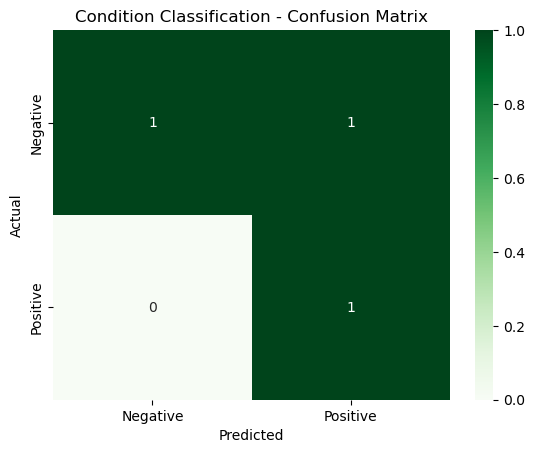

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Condition Classification - Confusion Matrix')
plt.show()

In [9]:
sample = ["This medicine caused too many side effects."]
sample_vec = vectorizer.transform(sample)
prediction = model.predict(sample_vec)
print("Condition Sentiment:", prediction[0])

Condition Sentiment: Positive
